In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [26]:
def xlsx_to_dataframe(filename):
    df = pd.read_excel(filename, sheet_name='May')
    # df = pd.concat(df.values(), ignore_index=True)
    return df

df = xlsx_to_dataframe("./Data/Data_Energy_Consumptions/33_Induction_Billet_Heater.xlsx")

In [33]:
df = pd.read_csv('./Data/data.csv')
df.set_index('Timestamp', inplace=True)

In [28]:
df['Real Energy'] = df['Real Energy'].replace("-", 0)
df = df[df['Real Energy'] != 0]
df

C:\Users\steli\AppData\Local\Temp\ipykernel_4780\1745693670.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Real Energy'] = df['Real Energy'].replace("-", 0)


,Timestamp,Real Energy,Reactive Energy Into the Load
0,2022-05-31 07:00:00,8715871.835,2657653.562
1,2022-05-31 06:45:00,8715865.106,2657650.01
2,2022-05-31 06:30:00,8715779.858,2657606.246
3,2022-05-31 06:15:00,8715677.645,2657553.779
4,2022-05-31 06:00:00,8715594.097,2657510.975
...,...,...,...
2875,2022-05-01 08:15:00,8527318.462,2579333.867
2876,2022-05-01 08:00:00,8527201.241,2579283.91
2877,2022-05-01 07:45:00,8527079.925,2579232.293
2878,2022-05-01 07:30:00,8526962.379,2579182.582


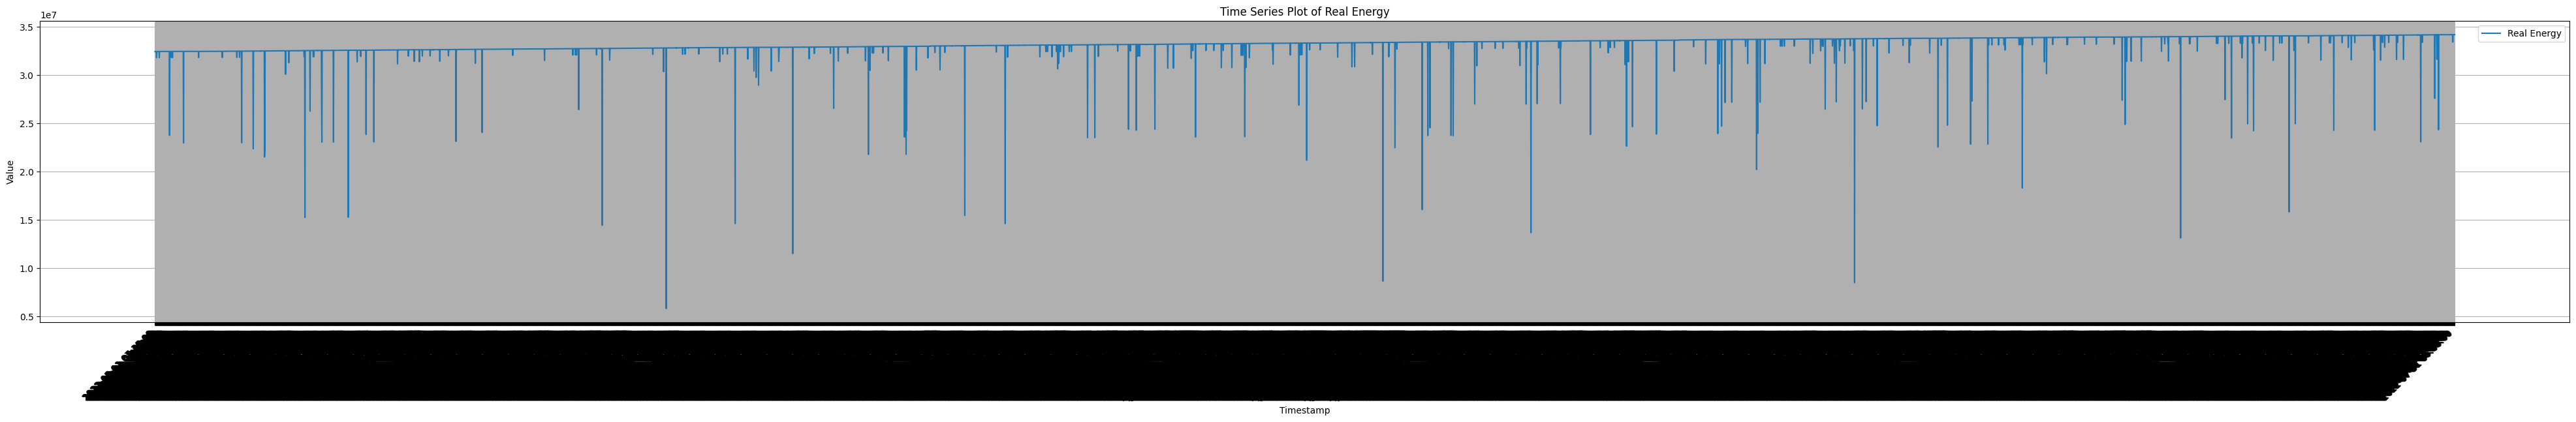

In [35]:
# Plotting the specific column
plt.figure(figsize=(50, 6))
plt.plot(df['Real Energy'], label='Real Energy')
plt.xticks(rotation=45, ha='right')
plt.title('Time Series Plot of Real Energy')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

df['hour_sin'] = np.sin(2 * np.pi * df['Timestamp'].dt.hour / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['Timestamp'].dt.hour / 24)
df['day_of_week_sin'] = np.sin(2 * np.pi * df['Timestamp'].dt.dayofweek / 7)
df['day_of_week_cos'] = np.cos(2 * np.pi * df['Timestamp'].dt.dayofweek / 7)
df['month_sin'] = np.sin(2 * np.pi * df['Timestamp'].dt.month / 12)
df['month_cos'] = np.cos(2 * np.pi * df['Timestamp'].dt.month / 12)
df['interval_sin'] = np.sin(2 * np.pi * df['Timestamp'].dt.minute // 15 / 4)
df['interval_cos'] = np.cos(2 * np.pi * df['Timestamp'].dt.minute // 15 / 4)

In [13]:
df['hour_cos']

0      -2.588190e-01
1      -2.588190e-01
2      -2.588190e-01
3      -5.000000e-01
4      -5.000000e-01
            ...     
8538    6.123234e-17
8539    6.123234e-17
8540    6.123234e-17
8541    6.123234e-17
8542   -2.588190e-01
Name: hour_cos, Length: 8543, dtype: float64